In [2]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
IBMQ.load_account()

/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
matplotlib inline

In [5]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [51]:
simulator = Aer.get_backend('qasm_simulator')

In [99]:
# Making the quantum circuit
def circuitI(gamma, beta, J, h1, h2):
    qc = QuantumCircuit(2, 2)
    qc.h([0, 1])
    qc.h(1)
    qc.cz(0,1)
    qc.rx(2*gamma*J, 1)
    qc.cz(0,1)
    qc.h(1)
    qc.i(0)
    qc.rz(2*gamma*h1, 0)
    qc.rz(2*gamma*h2, 1)
    qc.rx(2*beta, 0)
    qc.rx(2*beta, 1)
    qc.measure([0,1], [0,1])
    return qc

In [100]:
# Initializing the variables for A.
J = 0.5
h1 = -0.5
h2 = 0

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
resA = np.zeros([n, n, 4])
qc_list = []

# Running a simulation for each point
for i in range(n):
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)
        counts = execute(qc, backend = simulator, shots=1000).result().get_counts()
        resA[i][j][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                                 int(counts.get('11', 0))])

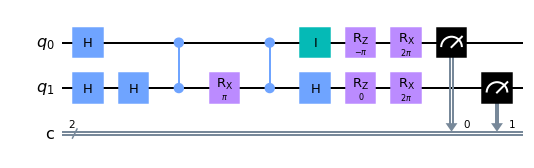

In [101]:
#Draw the current circuit
qc.draw(output='mpl')

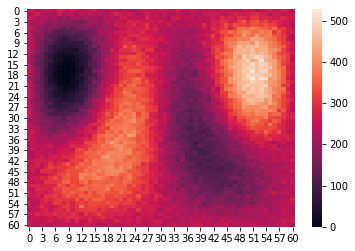

In [102]:
# Making a heatmap plot
sns.heatmap(resA[:, :, 0] * 0 + resA[:, :, 1] * 0 + resA[:, :, 2] + resA[:, :, 3] * 0)

In [103]:
# Initializing the variables for B.
J = 0
h1 = -1
h2 = 0

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
resB = np.zeros([n, n, 4])

# Running a simulation for each point
for i in range(n):
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)
        counts = execute(qc, backend = simulator, shots=1000).result().get_counts()
        resB[i][j][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                                 int(counts.get('11', 0))])

In [104]:
print(res)

[[[245. 261. 243. 251.]
  [249. 247. 270. 234.]
  [247. 254. 267. 232.]
  [243. 252. 253. 252.]
  [245. 237. 272. 246.]
  [244. 256. 236. 264.]
  [231. 243. 261. 265.]
  [243. 245. 255. 257.]
  [253. 234. 256. 257.]
  [254. 264. 218. 264.]
  [241. 247. 256. 256.]
  [246. 245. 256. 253.]
  [230. 261. 249. 260.]
  [261. 243. 261. 235.]
  [227. 263. 249. 261.]
  [246. 231. 279. 244.]
  [251. 275. 243. 231.]
  [234. 264. 251. 251.]
  [249. 243. 254. 254.]
  [243. 257. 255. 245.]
  [252. 226. 262. 260.]
  [247. 274. 246. 233.]
  [269. 250. 239. 242.]
  [271. 243. 244. 242.]
  [267. 256. 238. 239.]
  [244. 243. 233. 280.]
  [227. 281. 256. 236.]
  [234. 256. 249. 261.]
  [233. 258. 250. 259.]
  [271. 236. 268. 225.]
  [218. 270. 260. 252.]
  [251. 261. 227. 261.]
  [240. 253. 275. 232.]
  [253. 240. 249. 258.]
  [235. 274. 257. 234.]
  [249. 262. 239. 250.]
  [254. 258. 233. 255.]
  [250. 231. 249. 270.]
  [238. 242. 245. 275.]
  [246. 247. 260. 247.]
  [245. 278. 238. 239.]
  [232. 242. 256

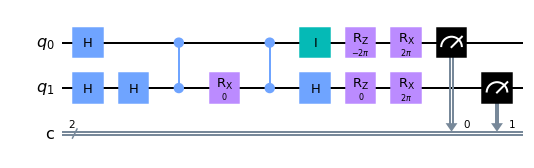

In [105]:
#Draw the current circuit
qc.draw(output='mpl')

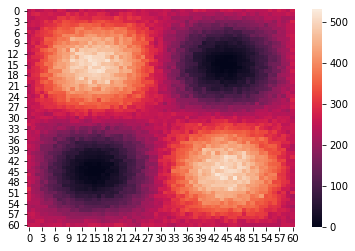

In [106]:
# Making a heatmap plot
sns.heatmap(resB[:, :, 3])

In [107]:
# Initializing the variables for C.
J = 0
h1 = -0.5
h2 = 0.5

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
resC = np.zeros([n, n, 4])

# Running a simulation for each point
for i in range(n):
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)
        counts = execute(qc, backend = simulator, shots=1000).result().get_counts()
        resC[i][j][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                                 int(counts.get('11', 0))])

In [108]:
print(res)

[[[245. 261. 243. 251.]
  [249. 247. 270. 234.]
  [247. 254. 267. 232.]
  [243. 252. 253. 252.]
  [245. 237. 272. 246.]
  [244. 256. 236. 264.]
  [231. 243. 261. 265.]
  [243. 245. 255. 257.]
  [253. 234. 256. 257.]
  [254. 264. 218. 264.]
  [241. 247. 256. 256.]
  [246. 245. 256. 253.]
  [230. 261. 249. 260.]
  [261. 243. 261. 235.]
  [227. 263. 249. 261.]
  [246. 231. 279. 244.]
  [251. 275. 243. 231.]
  [234. 264. 251. 251.]
  [249. 243. 254. 254.]
  [243. 257. 255. 245.]
  [252. 226. 262. 260.]
  [247. 274. 246. 233.]
  [269. 250. 239. 242.]
  [271. 243. 244. 242.]
  [267. 256. 238. 239.]
  [244. 243. 233. 280.]
  [227. 281. 256. 236.]
  [234. 256. 249. 261.]
  [233. 258. 250. 259.]
  [271. 236. 268. 225.]
  [218. 270. 260. 252.]
  [251. 261. 227. 261.]
  [240. 253. 275. 232.]
  [253. 240. 249. 258.]
  [235. 274. 257. 234.]
  [249. 262. 239. 250.]
  [254. 258. 233. 255.]
  [250. 231. 249. 270.]
  [238. 242. 245. 275.]
  [246. 247. 260. 247.]
  [245. 278. 238. 239.]
  [232. 242. 256

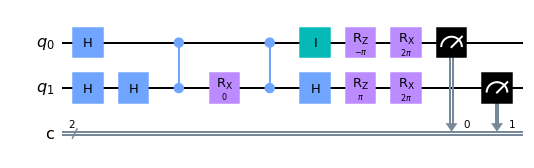

In [109]:
#Draw the current circuit
qc.draw(output='mpl')

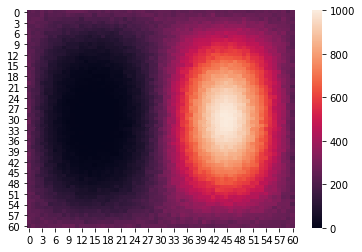

In [111]:
# Making a heatmap plot
sns.heatmap(resC[:, :, 2])

In [112]:
# Initializing the variables for D.
J = 1
h1 = 0
h2 = 0

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
resD = np.zeros([n, n, 4])

# Running a simulation for each point
for i in range(n):
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)
        counts = execute(qc, backend = simulator, shots=1000).result().get_counts()
        resD[i][j][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                                 int(counts.get('11', 0))])

In [113]:
print(res)

[[[245. 261. 243. 251.]
  [249. 247. 270. 234.]
  [247. 254. 267. 232.]
  [243. 252. 253. 252.]
  [245. 237. 272. 246.]
  [244. 256. 236. 264.]
  [231. 243. 261. 265.]
  [243. 245. 255. 257.]
  [253. 234. 256. 257.]
  [254. 264. 218. 264.]
  [241. 247. 256. 256.]
  [246. 245. 256. 253.]
  [230. 261. 249. 260.]
  [261. 243. 261. 235.]
  [227. 263. 249. 261.]
  [246. 231. 279. 244.]
  [251. 275. 243. 231.]
  [234. 264. 251. 251.]
  [249. 243. 254. 254.]
  [243. 257. 255. 245.]
  [252. 226. 262. 260.]
  [247. 274. 246. 233.]
  [269. 250. 239. 242.]
  [271. 243. 244. 242.]
  [267. 256. 238. 239.]
  [244. 243. 233. 280.]
  [227. 281. 256. 236.]
  [234. 256. 249. 261.]
  [233. 258. 250. 259.]
  [271. 236. 268. 225.]
  [218. 270. 260. 252.]
  [251. 261. 227. 261.]
  [240. 253. 275. 232.]
  [253. 240. 249. 258.]
  [235. 274. 257. 234.]
  [249. 262. 239. 250.]
  [254. 258. 233. 255.]
  [250. 231. 249. 270.]
  [238. 242. 245. 275.]
  [246. 247. 260. 247.]
  [245. 278. 238. 239.]
  [232. 242. 256

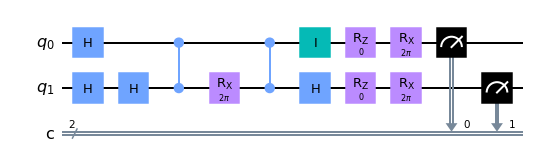

In [114]:
#Draw the current circuit
qc.draw(output='mpl')

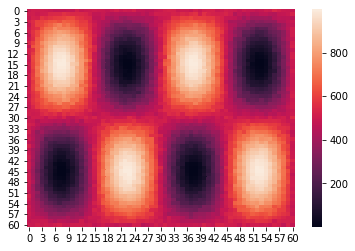

In [115]:
# Making a heatmap plot
sns.heatmap(resD[:, :, 0] + resD[:, :, 1] * 0 + resD[:, :, 2] * 0 + resD[:, :, 3]  )

In [122]:
koka = resD.swapaxes(0,1)

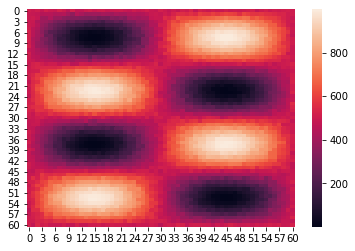

In [130]:
sns.heatmap(koka[:, :, 1] + koka[:, :, 2]  )